In [37]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
<ipython-input-37-ce84466

In [38]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [39]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [40]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

In [41]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##
    plt.figure(figsize=figsize) #setting figure size
    plt.hist(df['ratingScore']) #historgram using the ratingScore column
    plt.xlabel('Rating Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Hotel Ratings')
    plt.show()
    ## end ##

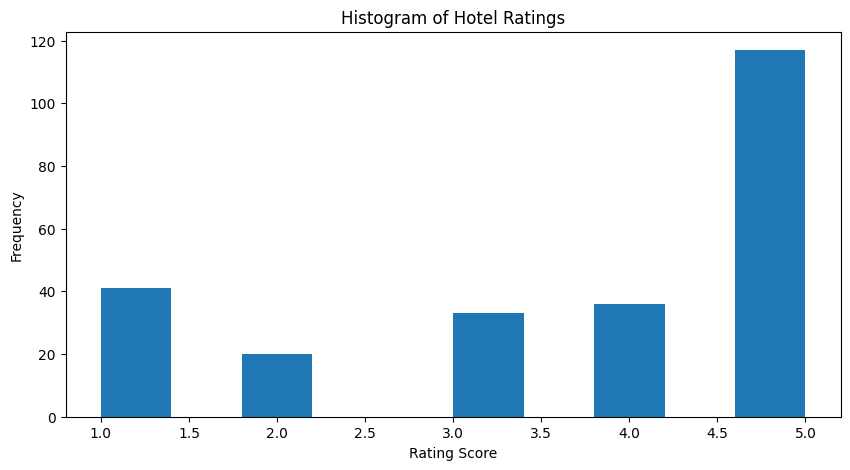

In [42]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

In [43]:
def plot_time_series(df: pd.DataFrame) -> None:
  ## Your code starts here ##
  fig, ax = plt.subplots(2, 1, figsize=(15,7), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

  for hotel in df['hotelName'].unique():
    _df = df[df['hotelName']== hotel].set_index('date_stamp') #grouping hotels by name and date
    _df.index = pd.to_datetime(_df.index)
    _df = _df.sort_index()
    _df['countReviews'] = 1
    _df['countReviews'].cumsum().plot(ax=ax[0], label=hotel, marker='o')
    _df['ratingScore'].rolling(5).mean().plot(ax=ax[1],label=hotel) #setting rolling avg for last 5 scores

  ax[1].set_ylabel('Avg Rating')
  ax[0].set_ylabel('Number of Reviews')
  plt.legend() #creating a legend for the hotels and their associated colors
  plt.show()
  ## end ##

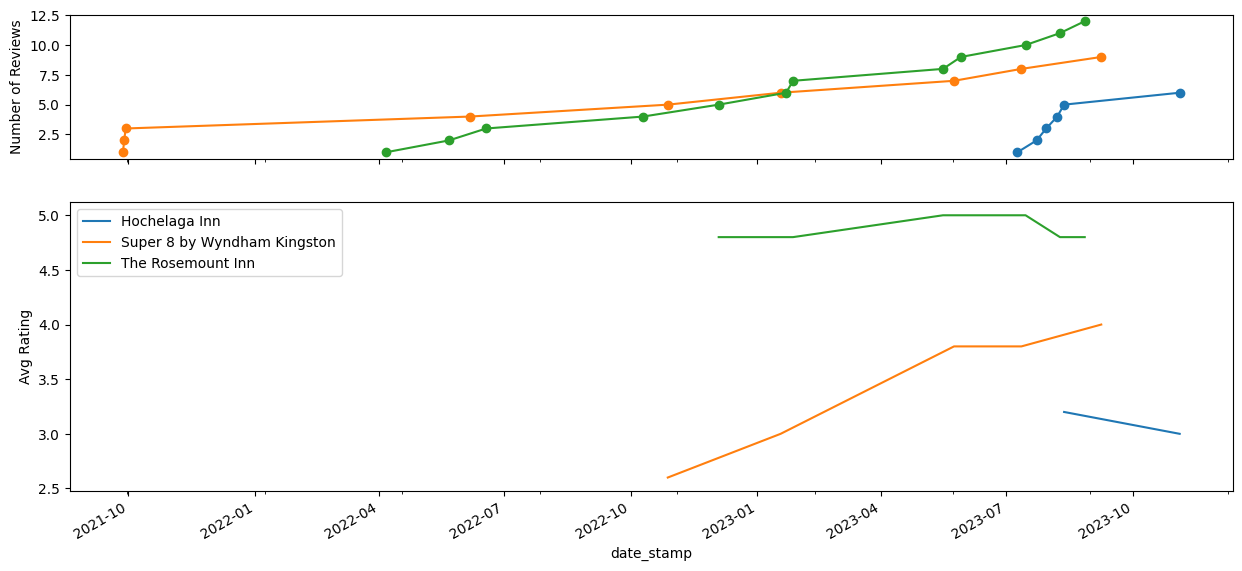

In [44]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

## (a)

In [45]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  stop = get_stop_words()
  counter = Counter()

  reviews = df['reviewColumn'].values #getting the values from reviewColumn
  #iterating through each review and feeding words into the counter
  for review in reviews:
    counter.update([word.lower()
                    for word in word_tokenize(review)
                    if word.lower() not in stop
                    and len(word) >= 3
                    and word.isalpha()])
  topk = counter.most_common(kwords) #top k most common
  ## end ##
  return topk

In [46]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

In [66]:
## Your code starts here ##
top500_words = most_frequent_words(hotelDf, 500)
for word, _ in top500_words:
  hotelDf[word] = hotelDf['reviewColumn'].str.lower().str.contains(word, regex=False).astype(int)
#top k mutual information terms in the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word, _ in topk:
        miScore.append([word, metrics.mutual_info_score(df[label_column], df[word])])
    miScoredf = pd.DataFrame(miScore).sort_values(1, ascending=False)
    miScoredf.columns = ['Word', 'MI Score']
    return miScoredf
mi_scores_df = getMI(top500_words, hotelDf)
mi_scores_df.head(5)
## end ##

,Word,MI Score
3,great,0.068478
98,dirty,0.066292
317,carpet,0.066292
268,smell,0.057568
288,pet,0.049044


## (c)

In [48]:
def calc_pmi(df: pd.DataFrame, word: str) -> pd.DataFrame:
  ## Your code starts here ##
  pmilist = [] #stores PMI results
  N = df.shape[0]
  df['wordPresent'] = df['reviewColumn'].str.contains(word, case=False)
  for sentiment in ['positive', 'negative']:
    for wordPresent in [False, True]:
      px = sum(df['groundTruth'] == sentiment) #reviews with specific sentiment
      py = sum(df['wordPresent'] == wordPresent) #reviews with specific noun phrase
      pxy = len(df[(df['groundTruth'] == sentiment) & (df['wordPresent'] == wordPresent)])
      if pxy == 0: #since log 0 cannot occur:
        pmi = math.log((pxy + 0.0001)*N/(px * py))
      else:
        pmi = math.log(pxy*N/(px*py))
      pmilist.append([sentiment] + [wordPresent] + [px] + [py] + [pxy] + [pmi])
    #putting results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)', 'wordPresent (y)', 'px', 'py', 'pxy', 'pmi']
  ## end ##
  return pmidf

In [67]:
# calc_pmi for "great"
great_pmi = calc_pmi(hotelDf, 'great')
great_pmi

,sentiment (x),wordPresent (y),px,py,pxy,pmi
0,positive,False,153,184,96,-0.171637
1,positive,True,153,63,57,0.378867
2,negative,False,94,184,88,0.228495
3,negative,True,94,63,6,-1.385282


In [68]:
# calc_pmi for "dirty"
dirty_pmi = calc_pmi(hotelDf, 'dirty')
dirty_pmi

,sentiment (x),wordPresent (y),px,py,pxy,pmi
0,positive,False,153,231,153,0.066971
1,positive,True,153,16,0,-11.503979
2,negative,False,94,231,78,-0.119615
3,negative,True,94,16,16,0.966094


## (d)

In [62]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [63]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [64]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  counter = Counter()
  reviews = df['reviewColumn'].values
  #this loop will tokenize the review, perform POS tagging, and parse using the chunker
  #it will extract the noun phrases using get_terms function and the update the counter with the
  #frequency of the noun phrase
  for review in reviews:
    counter.update(flatten_phrase_lists([word
                                        for word
                                        in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                                        ]))
    topk = counter.most_common(kNPs)
  ## end ##
  return topk

In [71]:
# Print top 10 most common noun phrases
top30 = getTopKNP(hotelDf, 30)
top30 = pd.DataFrame(top30, columns=['NP', 'Frequency']) #creating a dataframe
top30.head(10)

,NP,Frequency
0,front desk,32
1,next time,10
2,great locat,9
3,coffe maker,9
4,comfort bed,8
5,air condition,8
6,park lot,6
7,mini fridg,6
8,green acr inn,6
9,great experi,5


# Q4

## (a)

In [55]:
grammar = r"""
  NP: {<DT>?<JJ|JJS|JJR>*<NN|NNS>+}
"""
# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

## (b)

In [56]:
## Your code starts here ##
top50_nps = getTopKNP(hotelDf, 50)

def calculate_np_pmi(df, noun_phrases, sentiment):
    pmi_results = []
    #tqdm for a progress bar
    for np, _ in tqdm(noun_phrases):
        df['np_present'] = df['reviewColumn'].str.contains(np, case=False)
        N = df.shape[0] #total number of reviews
        px = sum(df['groundTruth'] == sentiment) #reviews with specific sentiment
        py = sum(df['np_present']) #reviews with specific noun phrase
        pxy = len(df[(df['groundTruth'] == sentiment) & (df['np_present'])])
        #log 0 cannot happen
        if pxy == 0 and (px != 0 and py != 0):
            pmi = math.log((pxy + 0.0001) * N / (px * py))
        elif px == 0 or py == 0 or pxy == 0:
            pmi = math.log(0.0001)
        else:
            pmi = math.log(pxy * N / (px * py))

        pmi_results.append([np, pmi])

    return pd.DataFrame(pmi_results, columns=['Noun Phrase', 'PMI'])
## end ##

In [72]:
# Positive PMI
positive_pmi_df = calculate_np_pmi(hotelDf, top50_nps, 'positive')
positive_pmi_df.sort_values('PMI', ascending=False).head(5)

100%|██████████| 50/50 [00:00<00:00, 54.13it/s]


,Noun Phrase,PMI
40,water slide,0.47895
8,great experi,0.47895
28,great view,0.47895
14,super clean,0.47895
44,outdoor pool,0.47895


In [73]:
# Negative PMI
negative_pmi_df = calculate_np_pmi(hotelDf, top50_nps, 'negative')
negative_pmi_df.sort_values('PMI', ascending=False).head(5)

100%|██████████| 50/50 [00:00<00:00, 80.78it/s]


,Noun Phrase,PMI
49,good size,0.966094
48,bathroom door,0.966094
46,good choic,0.966094
39,first floor,0.966094
38,last time,0.966094
